In [31]:
#Importing the datset we have New dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filenames = [
    "../data/pct_data_2018.csv",
    "../data/pct_data_2019.csv",
    "../data/pct_data_2020.csv",
    "../data/pct_data_2021.csv",
    "../data/pct_data_2022.csv",
    "../data/pct_data_2023.csv",
    "../data/pct_data_2024.csv"
]

# Read each file into a DF and store them in a list
dataframes = [pd.read_csv (f, sep=';') for f in filenames]

# Concatenate all dfs into a single df
raw_data= pd.concat(dataframes, ignore_index=True)
raw_dataset = raw_data

In [32]:
raw_dataset.shape

(109897, 33)

Eliminate I category

In [33]:
# Define a function that categorizes sepsis based on PCT values
def categorize_sepsis(pct_value):
    if pct_value > 2:
        return 'P'  # Yes, sepsis likely
    elif pct_value >= 0.1:
        return 'I'  # Maybe, intermediate or gray area
    else:
        return 'N'  # No, sepsis unlikely

# Apply this function to the 'PCT' column to create a new categorical column
raw_dataset['sepsis_cat'] = raw_dataset['PCT'].apply(categorize_sepsis)

# Insert the 'sepsis_cat' column before the 'PCT' column
pct_index = raw_dataset.columns.get_loc('PCT')  # Find the index of 'PCT' column
raw_dataset.insert(pct_index, 'sepsis_cat', raw_dataset.pop('sepsis_cat'))
raw_dataset.shape

(109897, 34)

In [34]:
# Data subsets for different sepsis categories
pct_data_sepsis_yes = raw_dataset[raw_dataset['sepsis_cat'] == 'P']
pct_data_sepsis_no = raw_dataset[raw_dataset['sepsis_cat'] == 'N']
pct_data_sepsis_I = raw_dataset[raw_dataset['sepsis_cat'] == 'I']
combined_data = pd.concat([pct_data_sepsis_yes, pct_data_sepsis_no], axis=0)
print(combined_data.shape)
print(pct_data_sepsis_I.shape)

(69923, 34)
(39974, 34)


In [35]:
raw_dataset = combined_data
raw_dataset.shape

(69923, 34)

Correction of sex labels

In [36]:
# Filter the DataFrame to keep only rows where 'sex' is either 'M' or 'W'
raw_dataset = raw_dataset[raw_dataset['sex'].isin(['m', 'f'])]
pct_data_sepsis_I = pct_data_sepsis_I[pct_data_sepsis_I['sex'].isin(['m', 'f'])]
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)

(68727, 34)
(39010, 34)


In [37]:
# Transform sex column: 'f' to 'W' and 'm' to 'M'
raw_dataset['sex'] = raw_dataset['sex'].replace({'f': 'W', 'm': 'M'})
pct_data_sepsis_I['sex'] = pct_data_sepsis_I['sex'].replace({'f': 'W', 'm': 'M'})
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)

(68727, 34)
(39010, 34)


C:\Users\menia\AppData\Local\Temp\ipykernel_20896\1315486616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset['sex'] = raw_dataset['sex'].replace({'f': 'W', 'm': 'M'})


In [38]:
columns_to_drop = ['%h-ERY', 'NOR-Ge', 'XNRBC', 'Unnamed: 0']
raw_dataset.drop(columns=columns_to_drop, axis=1, inplace=True)
pct_data_sepsis_I.drop(columns=columns_to_drop, axis=1, inplace=True)
print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)

(68727, 30)
(39010, 30)


C:\Users\menia\AppData\Local\Temp\ipykernel_20896\1842070725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset.drop(columns=columns_to_drop, axis=1, inplace=True)


In [39]:
current_year = 2024
raw_dataset['age'] = current_year - raw_dataset['year_of_birth']
# Drop the 'year_of_birth' column without reassigning clean_data
raw_dataset.drop('year_of_birth', axis=1, inplace=True)

pct_data_sepsis_I['age'] = current_year - pct_data_sepsis_I['year_of_birth']
# Drop the 'year_of_birth' column without reassigning clean_data
pct_data_sepsis_I.drop('year_of_birth', axis=1, inplace=True)

print(raw_dataset.shape)
print(pct_data_sepsis_I.shape)

(68727, 30)
(39010, 30)


C:\Users\menia\AppData\Local\Temp\ipykernel_20896\1461858049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset['age'] = current_year - raw_dataset['year_of_birth']
C:\Users\menia\AppData\Local\Temp\ipykernel_20896\1461858049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_dataset.drop('year_of_birth', axis=1, inplace=True)


In [40]:
count_null_or_negative = (raw_dataset['age'].isna() | (raw_dataset['age'] <= 0)).sum()
count_null_or_negativeI = (pct_data_sepsis_I['age'].isna() | (pct_data_sepsis_I['age'] <= 0)).sum()

print("Count of null or negative values in 'age' column:", count_null_or_negative)
print("Count of null or negative values in 'age' column:", count_null_or_negativeI)

Count of null or negative values in 'age' column: 2
Count of null or negative values in 'age' column: 1


In [41]:
filtered_df = raw_dataset

In [42]:
# Remove rows where the 'age' column has null values
filtered_df = filtered_df.dropna(subset=['age'])
pct_data_sepsis_I = pct_data_sepsis_I.dropna(subset=['age'])

In [43]:
# Calculate the count of null values in each column
null_counts = filtered_df.isnull().sum()
null_countsI = pct_data_sepsis_I.isnull().sum()

# Print the count of null values for each column
print(null_counts)
print(null_countsI)


order_number    0
sex             0
sepsis_cat      0
PCT             0
IL6             0
HK              0
LYMABS          0
THROMB          0
MONOZY          0
HB              0
GRANAB          0
MPV             0
RDW-SD          0
MicroE          0
MCHC            0
LYMPHO          0
IG%             0
IG#             0
ERY             0
EOSABS          0
MakroE          0
MCH             0
GRANUL          0
EOSINO          0
LEUKO           0
BASOAB          0
MCV             0
MONABS          0
BASOPH          0
age             0
dtype: int64
order_number    0
sex             0
sepsis_cat      0
PCT             0
IL6             0
HK              0
LYMABS          0
THROMB          0
MONOZY          0
HB              0
GRANAB          0
MPV             0
RDW-SD          0
MicroE          0
MCHC            0
LYMPHO          0
IG%             0
IG#             0
ERY             0
EOSABS          0
MakroE          0
MCH             0
GRANUL          0
EOSINO          0
LEUKO          

In [44]:
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)

(68725, 30)
(39009, 30)


In [45]:
#Counting minus 1 on all columns:
counts_minus_one = (filtered_df == -1).sum()

# Display the count for each column
print(counts_minus_one)

#Counting minus 1 on all columns:
counts_minus_oneI = (pct_data_sepsis_I == -1).sum()

# Display the count for each column
print(counts_minus_oneI)

order_number        0
sex                 0
sepsis_cat          0
PCT              1645
IL6             52524
HK               1712
LYMABS          19363
THROMB           1722
MONOZY          19379
HB               1712
GRANAB          19370
MPV             29770
RDW-SD          29187
MicroE           2256
MCHC             1713
LYMPHO          19364
IG%             18411
IG#             47663
ERY              1712
EOSABS          24072
MakroE           2246
MCH              1712
GRANUL          19370
EOSINO          24277
LEUKO            1735
BASOAB          20301
MCV              1712
MONABS          19380
BASOPH          20337
age                 0
dtype: int64
order_number        0
sex                 0
sepsis_cat          0
PCT                 0
IL6             22946
HK                944
LYMABS          16612
THROMB            947
MONOZY          16641
HB                944
GRANAB          16632
MPV             17789
RDW-SD          17263
MicroE           1365
MCHC              9

In [46]:
# Calculate the percentage of '-1' values for each column
percentage_minus_one = (counts_minus_one / filtered_df.shape[0]) * 100
percentage_minus_oneI = (counts_minus_oneI / pct_data_sepsis_I.shape[0]) * 100

# Display the percentage for each column
print(percentage_minus_one)
print(percentage_minus_oneI)


order_number     0.000000
sex              0.000000
sepsis_cat       0.000000
PCT              2.393598
IL6             76.426337
HK               2.491088
LYMABS          28.174609
THROMB           2.505638
MONOZY          28.197890
HB               2.491088
GRANAB          28.184794
MPV             43.317570
RDW-SD          42.469262
MicroE           3.282648
MCHC             2.492543
LYMPHO          28.176064
IG%             26.789378
IG#             69.353219
ERY              2.491088
EOSABS          35.026555
MakroE           3.268097
MCH              2.491088
GRANUL          28.184794
EOSINO          35.324845
LEUKO            2.524554
BASOAB          29.539469
MCV              2.491088
MONABS          28.199345
BASOPH          29.591852
age              0.000000
dtype: float64
order_number     0.000000
sex              0.000000
sepsis_cat       0.000000
PCT              0.000000
IL6             58.822323
HK               2.419954
LYMABS          42.585044
THROMB           2.4276

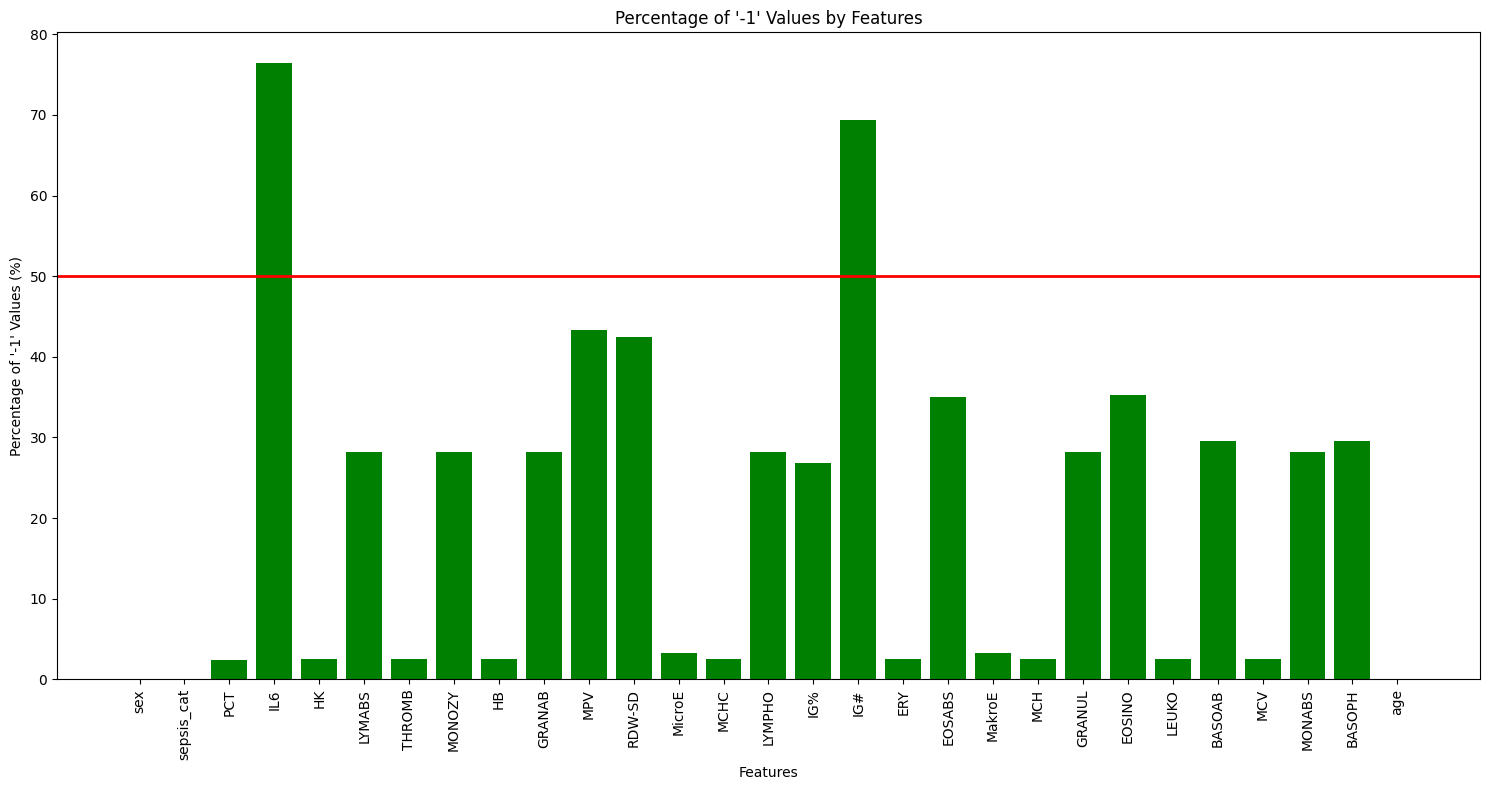

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# New dataset with updated values
percentage_minus_one = pd.Series({
    'sex': 0.000000,
    'sepsis_cat': 0.000000,
    'PCT': 2.393598,
    'IL6': 76.426337,
    'HK': 2.491088,
    'LYMABS': 28.174609,
    'THROMB': 2.505638,
    'MONOZY': 28.197890,
    'HB': 2.491088,
    'GRANAB': 28.184794,
    'MPV': 43.317570,
    'RDW-SD': 42.469262,
    'MicroE': 3.282648,
    'MCHC': 2.492543,
    'LYMPHO': 28.176064,
    'IG%': 26.789378,
    'IG#': 69.353219,
    'ERY': 2.491088,
    'EOSABS': 35.026555,
    'MakroE': 3.268097,
    'MCH': 2.491088,
    'GRANUL': 28.184794,
    'EOSINO': 35.324845,
    'LEUKO': 2.524554,
    'BASOAB': 29.539469,
    'MCV': 2.491088,
    'MONABS': 28.199345,
    'BASOPH': 29.591852,
    'age': 0.000000
})


# Create a bar chart
plt.figure(figsize=(15, 8))  # Adjusted the figure size for better visibility
plt.bar(percentage_minus_one.index, percentage_minus_one.values, color='green')
plt.xlabel('Features')
plt.ylabel('Percentage of \'-1\' Values (%)')
plt.title('Percentage of \'-1\' Values by Features')
# Add a horizontal line at 60%
plt.axhline(y=50, color='r', linestyle='-', linewidth=2)  # red line, solid, width of 2
plt.xticks(rotation=90)  # Rotates the test parameter names for better visibility
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()


In [48]:
columns_to_drop =['IG#', 'IL6']
filtered_df.drop(columns=columns_to_drop, axis=1, inplace=True)
pct_data_sepsis_I.drop(columns=columns_to_drop, axis=1, inplace=True)

C:\Users\menia\AppData\Local\Temp\ipykernel_20896\186374524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [49]:
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)

(68725, 28)
(39009, 28)


In [50]:
#Filter out rows where PCT == -1
filtered_df = filtered_df[filtered_df['PCT'] != -1]
pct_data_sepsis_I = pct_data_sepsis_I[pct_data_sepsis_I['PCT'] != -1]

In [51]:
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)

(67080, 28)
(39009, 28)


In [52]:
#Counting minus 1 on all columns:
counts_minus_one = (filtered_df == -1).sum()

# Display the count for each column
print(counts_minus_one)

#Counting minus 1 on all columns:
counts_minus_oneI = (pct_data_sepsis_I == -1).sum()

# Display the count for each column
print(counts_minus_oneI)

order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK               1110
LYMABS          18457
THROMB           1119
MONOZY          18472
HB               1110
GRANAB          18464
MPV             28558
RDW-SD          27989
MicroE           1639
MCHC             1110
LYMPHO          18458
IG%             17534
ERY              1110
EOSABS          23084
MakroE           1629
MCH              1110
GRANUL          18464
EOSINO          23283
LEUKO            1132
BASOAB          19373
MCV              1110
MONABS          18473
BASOPH          19408
age                 0
dtype: int64
order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK                944
LYMABS          16612
THROMB            947
MONOZY          16641
HB                944
GRANAB          16632
MPV             17789
RDW-SD          17263
MicroE           1365
MCHC              944
LYMPHO          16612
IG%             15827
ERY               9

In [53]:
# Replace -1 values with NaN
filtered_df.replace(-1, pd.NA, inplace=True)
pct_data_sepsis_I.replace(-1, pd.NA, inplace=True)

# Counting minus 1 on all columns (this will now count NaN instead of -1)
counts_minus_one = filtered_df.isna().sum()
counts_minus_oneI = pct_data_sepsis_I.isna().sum()

# Display the count for each column
print(counts_minus_one)
print(counts_minus_oneI)


order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK               1110
LYMABS          18457
THROMB           1119
MONOZY          18472
HB               1110
GRANAB          18464
MPV             28558
RDW-SD          27989
MicroE           1639
MCHC             1110
LYMPHO          18458
IG%             17534
ERY              1110
EOSABS          23084
MakroE           1629
MCH              1110
GRANUL          18464
EOSINO          23283
LEUKO            1132
BASOAB          19373
MCV              1110
MONABS          18473
BASOPH          19408
age                 0
dtype: int64
order_number        0
sex                 0
sepsis_cat          0
PCT                 0
HK                944
LYMABS          16612
THROMB            947
MONOZY          16641
HB                944
GRANAB          16632
MPV             17789
RDW-SD          17263
MicroE           1365
MCHC              944
LYMPHO          16612
IG%             15827
ERY               9

In [54]:
print(filtered_df.shape)
print(pct_data_sepsis_I.shape)

(67080, 28)
(39009, 28)


In [55]:
print(filtered_df.columns)
print(pct_data_sepsis_I.columns)

Index(['order_number', 'sex', 'sepsis_cat', 'PCT', 'HK', 'LYMABS', 'THROMB',
       'MONOZY', 'HB', 'GRANAB', 'MPV', 'RDW-SD', 'MicroE', 'MCHC', 'LYMPHO',
       'IG%', 'ERY', 'EOSABS', 'MakroE', 'MCH', 'GRANUL', 'EOSINO', 'LEUKO',
       'BASOAB', 'MCV', 'MONABS', 'BASOPH', 'age'],
      dtype='object')
Index(['order_number', 'sex', 'sepsis_cat', 'PCT', 'HK', 'LYMABS', 'THROMB',
       'MONOZY', 'HB', 'GRANAB', 'MPV', 'RDW-SD', 'MicroE', 'MCHC', 'LYMPHO',
       'IG%', 'ERY', 'EOSABS', 'MakroE', 'MCH', 'GRANUL', 'EOSINO', 'LEUKO',
       'BASOAB', 'MCV', 'MONABS', 'BASOPH', 'age'],
      dtype='object')


# first dataset: Leipzig papers: Age, Sex, HB, MCV, PLT ( THROMB) , RBC( ERY) , WBC( LEUKO) , !!!!!!!!!!!!!!!!!!  2 HB

In [56]:
# Select specific columns
selected_columns = [
    'age', 'sex', 'HB', 'MCV', 'THROMB', 'ERY', 'LEUKO', 'PCT']

# Creating a new DataFrame with only the selected columns
first_df = filtered_df[selected_columns]

# Display the new DataFrame
print(first_df.head())

     age sex    HB    MCV THROMB   ERY LEUKO    PCT
6   60.0   M  10.0   93.4     48  3.18  10.8   2.34
12  90.0   M  11.6   90.2    104  3.68   6.6   6.54
13  80.0   M  11.2   93.5    434  3.72  14.5   5.22
15  55.0   M  11.5  101.8    144  3.37   6.5   3.33
25  68.0   W   9.2   89.9    303  3.06  11.3  36.60


In [57]:
# Counting NULL on all columns (this will now count NaN instead of -1)
counts_minus_one = first_df.isna().sum()
print(counts_minus_one)

age          0
sex          0
HB        1110
MCV       1110
THROMB    1119
ERY       1110
LEUKO     1132
PCT          0
dtype: int64


In [58]:
#KNN
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Convert pd.NA to np.nan
first_df = first_df.replace({pd.NA: np.nan})

# One-hot encode the 'sex' column
# One-hot encode the 'sex' column and drop the first category
first_df = pd.get_dummies(first_df, columns=['sex'], drop_first=True)
# Step 3: Setup the Iterative Imputer with a KNN estimator
# You can adjust the number of neighbors (`n_neighbors`) as needed
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5), max_iter=10, random_state=0)

# Step 4: Fit and transform the data
# This will fill in all missing values in the dataframe
first_df_imputed = pd.DataFrame(imputer.fit_transform(first_df), columns=first_df.columns)

C:\Users\menia\AppData\Local\Temp\ipykernel_20896\3520176608.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  first_df = first_df.replace({pd.NA: np.nan})
c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best ROC AUC Score:  0.9167868674759326
Best parameters:  {'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 300}
auc_scores [0.9126909462963955, 0.917693949147534, 0.917989420940565, 0.9157244126343845, 0.9198356083607838]
Mean auc_scores: 0.9167868674759326
accuracy_scores [0.810077519379845, 0.8571109123434705, 0.865757304710793, 0.864788312462731, 0.8559928443649374]
Mean accuracy_scores: 0.8507453786523553
precision_scores [0.4515033947623666, 0.5347786811201445, 0.5559858018715714, 0.5544328552803129, 0.5318208603417797]
Mean precision_scores: 0.525704318675235
recall_scores [0.866852886405959, 0.8268156424581006, 0.8021415270018621, 0.7918994413407822, 0.840316573556797]
Mean recall_scores: 0.8256052141527002
f1_scores [0.59375, 0.6494788809654416, 0.656756241661902, 0.6522239263803681, 0.651389390111873]
Mean f1_scores: 0.640719687823917
confusion_matrices [[48201  8139]
 [ 1873  8867]]


c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\menia\Desktop\PortefolioML\Sepsis\v

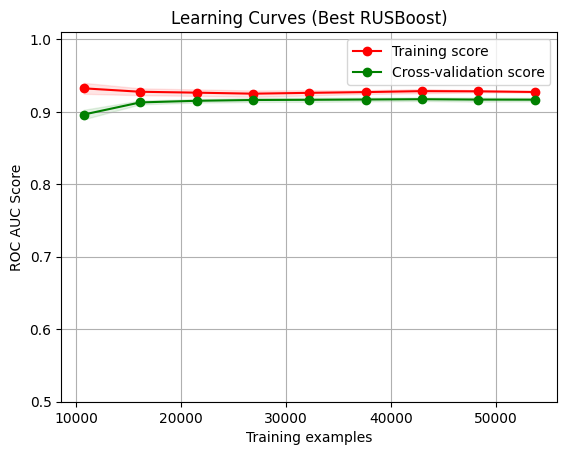

In [59]:
# RUSBoost
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load or define your DataFrame
data = first_df_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data['Label'] = np.where(data['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data.columns.difference(['PCT', 'Label'])
X = data[features]
y = data['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Define the parameter grid
param_grid = {
    'estimator__max_depth': [5, 10, 15],
    'n_estimators': [100, 300, 500, 700, 900],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Create a RUSBoost model with specified parameters
rusboost = RUSBoostClassifier(
    estimator=DecisionTreeClassifier(),
    algorithm='SAMME.R',
    random_state=1714400672
)

# Setup GridSearchCV
grid_search = GridSearchCV(rusboost, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Print best score and best parameters
print("Best ROC AUC Score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

# Perform detailed evaluation on the best model
scores = {}
scores['auc_scores'] = []
scores['accuracy_scores'] = []
scores['precision_scores'] = []
scores['recall_scores'] = []
scores['f1_scores'] = []
scores['confusion_matrices'] = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    scores['auc_scores'].append(roc_auc_score(y_test, y_pred_prob))
    scores['accuracy_scores'].append(accuracy_score(y_test, y_pred))
    scores['precision_scores'].append(precision_score(y_test, y_pred))
    scores['recall_scores'].append(recall_score(y_test, y_pred))
    scores['f1_scores'].append(f1_score(y_test, y_pred))
    scores['confusion_matrices'].append(confusion_matrix(y_test, y_pred))

# Display all results
for metric, values in scores.items():
    if metric == 'confusion_matrices':
        print(metric, np.sum(values, axis=0))
    else:
        print(metric, values)
        print("Mean {}: {}".format(metric, np.mean(values)))

# Plot learning curves for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best RUSBoost)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [63]:
#SMOTE_bad results
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imblearnPipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load or define your DataFrame
data_smote = first_df_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data_smote['Label'] = np.where(data_smote['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data_smote.columns.difference(['PCT', 'Label'])
X = data_smote[features]
y = data_smote['Label']

# Create a pipeline with SMOTE and AdaBoost
pipeline = imblearnPipeline([
    ('smote', SMOTE(random_state=42)),
    ('adaboost', AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=5),
        random_state=1714400672
    ))
])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Define the parameter grid
param_grid = {
    'smote__k_neighbors': [5, 10, 15],
    'adaboost__n_estimators': [100, 300, 500, 700, 900],
    'adaboost__learning_rate': [0.01, 0.1, 0.5, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Print best score and best parameters
print("Best ROC AUC Score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

# Plot learning curves for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)  # Smaller steps in train sizes for better resolution
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best AdaBoost with SMOTE)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [64]:
# Balanced Random Forest
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load or define your DataFrame
data_brf = first_df_imputed  # Replace 'first_df_imputed' with your actual DataFrame name

# Define the target based on 'PCT' values
data_brf['Label'] = np.where(data_brf['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data_brf.columns.difference(['PCT', 'Label'])
X = data_brf[features]
y = data_brf['Label']

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700, 900],
    'max_depth': [None, 5, 10],
    'max_leaf_nodes': [None, 20, 40, 60],
    'min_samples_split': [2, 5, 10]
}

# Create a Balanced Random Forest model with specified parameters
brf = BalancedRandomForestClassifier(random_state=1714400672, n_jobs=-1)

# Setup GridSearchCV
grid_search = GridSearchCV(brf, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Print best score and best parameters
print("Best ROC AUC Score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

# Perform detailed evaluation on the best model
metrics = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']
results = {metric: [] for metric in metrics}
confusion_matrices = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    results['roc_auc'].append(roc_auc_score(y_test, y_pred_prob))
    results['accuracy'].append(accuracy_score(y_test, y_pred))
    results['precision'].append(precision_score(y_test, y_pred))
    results['recall'].append(recall_score(y_test, y_pred))
    results['f1'].append(f1_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Display results
for metric, scores in results.items():
    print(f"{metric.capitalize()} Scores for each fold: ", scores)
    print(f"Mean {metric.capitalize()} Score: ", np.mean(scores))
print("Confusion Matrices: ", confusion_matrices)

# Define specific training sizes
train_sizes = [10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

# Plot learning curves for the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=train_sizes
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best Balanced Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

Fitting 5 folds for each of 180 candidates, totalling 900 fits


KeyboardInterrupt: 

In [ ]:
#xgboost
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, GridSearchCV, learning_curve
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load or define your DataFrame
data_xgb = first_df_imputed  # Assume this is your DataFrame with imputed values

# Define the target based on 'PCT' values
data_xgb['Label'] = np.where(data_xgb['PCT'] > 2, 1, 0)

# Select features excluding 'PCT' and 'Label'
features = data_xgb.columns.difference(['PCT', 'Label'])
X = data_xgb[features]
y = data_xgb['Label']

# Calculate the scale_pos_weight for imbalanced dataset
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

# Setup cross-validation
cv = StratifiedKFold(n_splits=5)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'scale_pos_weight': [scale_pos_weight, 1, 10]
}

# Create a XGBoost model with specified parameters
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=1714400672
)

# Setup GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Print best score and best parameters
print("Best ROC AUC Score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

# Perform detailed evaluation on the best model
metrics = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']
results = {metric: [] for metric in metrics}
confusion_matrices = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the model
    best_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    # Predict outcomes
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    results['roc_auc'].append(roc_auc_score(y_test, y_pred_prob))
    results['accuracy'].append(accuracy_score(y_test, y_pred))
    results['precision'].append(precision_score(y_test, y_pred))
    results['recall'].append(recall_score(y_test, y_pred))
    results['f1'].append(f1_score(y_test, y_pred))
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

# Display results
for metric, scores in results.items():
    print(f"{metric.capitalize()} Scores for each fold: ", scores)
    print(f"Mean {metric.capitalize()} Score: ", np.mean(scores))
print("Confusion Matrices: ", confusion_matrices)

# Plot learning curves for the best model
train_sizes = [10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]  # Adjust based on your dataset size
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='roc_auc', n_jobs=-1,
    train_sizes=train_sizes
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (Best XGBoost Model)")
plt.xlabel("Training examples")
plt.ylabel("ROC AUC Score")
plt.ylim((0.5, 1.01))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
#eVALUATE rusbOOST and SMOTE ALONE Then add hyperparameter tuning to both then explore ensemble learning and check overfitting for both